In [1]:
import mpmath as mp
from mpmath import sin
from mpmath import cos
from mpmath import sinh
from mpmath import cosh
from mpmath import tan
from mpmath import exp
from mpmath import mpf
from math import pi
from mpmath import sign
import colorsys
import matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
from math import ceil
from math import floor
from math import log

In [2]:
f1 = lambda x: cos(x) * cosh(x) - mpf(1) # [3/2*pi, 2pi]
f2 = lambda x: mpf(1) / x - tan(x) # [0, pi / 2]
f3 = lambda x: mpf(2) ** (-x) + exp(x) + mpf(2) * cos(x) - mpf(6) # [1, 3]

Text(0.5, 1.0, 'f1(x)')

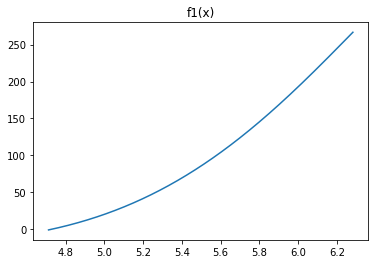

In [3]:
args = np.linspace(3 / 2 * pi, 2 * pi, 1000)
values = [f1(x) for x in args]
plt.plot(args, values)
plt.title("f1(x)")

Text(0.5, 1.0, 'f3(x)')

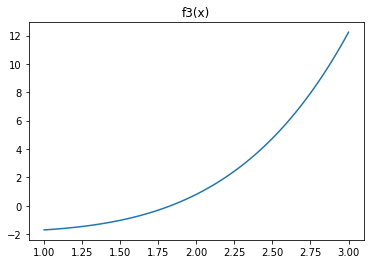

In [4]:
args = np.linspace(1, 3, 100)
values = [f3(x) for x in args]
plt.plot(args, values)
plt.title("f3(x)")

In [5]:
def bisection(f, precision, a, b, absError):
    steps = 0
    if f(a) * f(b) > 0:
        print("Invalid data")
        return
    with mp.workdps(precision):
        while (b - a) / mpf(2) > absError:
            pivot = a + (b - a) / mpf(2)
            if f(pivot) == 0:
                return (pivot, steps)
            if f(a) * f(pivot) < mpf(0):
                b = pivot
            else:
                a = pivot
            
            steps += 1
        
        return a + (b - a) / mpf(2), f(a + (b - a) / mpf(2)), steps

# a)

In [6]:
precision = 50

# f1

a = mpf(3 / 2 * pi)
b = mpf(2 * pi)

absError = mpf('1e-7')
print("Test f1 dla dokładności:", absError)
x0, value, steps = bisection(f1, precision, a, b, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

absError = mpf('1e-15')
print("Test f1 dla dokładności:", absError)
x0, value, steps = bisection(f1, precision, a, b, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

absError = mpf('1e-33')
print("Test f1 dla dokładności:", absError)
x0, value, steps = bisection(f1, precision, a, b, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

Test f1 dla dokładności: 1.0e-7
Miejsce zerowe: 4.73004071377595 
Wartość: -1.79201194018308e-6 
Liczba kroków: 23 
---------------
Test f1 dla dokładności: 1.0e-15
Miejsce zerowe: 4.7300407448627 
Wartość: -8.4364080361555e-15 
Liczba kroków: 50 
---------------
Test f1 dla dokładności: 1.0e-33
Miejsce zerowe: 4.7300407448627 
Wartość: 7.57621085198532e-33 
Liczba kroków: 110 
---------------


In [7]:
#f2, funkcja ma osobliwość dla x = 0, dlatego jako przedział lewostronny ustalam 0 + absError

a = mpf(0 + absError)
b = mpf(pi / 2)

absError = mpf('1e-7')
print("Test f2 dla dokładności:", absError)
x0, value, steps = bisection(f2, precision, a, b, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

absError = mpf('1e-15')
print("Test f2 dla dokładności:", absError)
x0, value, steps = bisection(f2, precision, a, b, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

absError = mpf('1e-33')
print("Test f2 dla dokładności:", absError)
x0, value, steps = bisection(f2, precision, a, b, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

Test f2 dla dokładności: 1.0e-7
Miejsce zerowe: 0.860333555568744 
Wartość: 1.23836517936887e-7 
Liczba kroków: 23 
---------------
Test f2 dla dokładności: 1.0e-15
Miejsce zerowe: 0.86033358901938 
Wartość: 9.39911411925652e-16 
Liczba kroków: 50 
---------------
Test f2 dla dokładności: 1.0e-33
Miejsce zerowe: 0.86033358901938 
Wartość: 2.47280152821452e-34 
Liczba kroków: 110 
---------------


In [8]:
# f3

a = mpf(1)
b = mpf(3)

absError = mpf('1e-7')
print("Test f3 dla dokładności:", absError)
x0, value, steps = bisection(f3, precision, a, b, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

absError = mpf('1e-15')
print("Test f3 dla dokładności:", absError)
x0, value, steps = bisection(f3, precision, a, b, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

absError = mpf('1e-33')
print("Test f3 dla dokładności:", absError)
x0, value, steps = bisection(f3, precision, a, b, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

Test f3 dla dokładności: 1.0e-7
Miejsce zerowe: 1.82938355207443 
Wartość: -2.04498377917572e-7 
Liczba kroków: 24 
---------------
Test f3 dla dokładności: 1.0e-15
Miejsce zerowe: 1.82938360193385 
Wartość: 2.44207456179949e-15 
Liczba kroków: 50 
---------------
Test f3 dla dokładności: 1.0e-33
Miejsce zerowe: 1.82938360193385 
Wartość: 8.70172071178167e-34 
Liczba kroków: 110 
---------------


# b)

Dla wygody, tworzę nową funkcję bisectionConvergence, która zwróci tylko węzły wyliczane podczas szukania miejsca zerowego.
W pp. b, c, d posługuję się funkcją f1. Wykresy dla pozostałych funkcji tworzy się analogicznie.

In [9]:
def bisectionConvergence(f, precision, a, b, absError):
    steps = 0
    stepsArr = []
    if f(a) * f(b) > 0:
        print("Invalid data")
        return
    with mp.workdps(precision):
        while (b - a) / mpf(2) > absError:
            pivot = a + (b - a) / mpf(2)
            stepsArr.append(pivot)
            if f(pivot) == 0:
                return (pivot, steps)
            if f(a) * f(pivot) < mpf(0):
                b = pivot
            else:
                a = pivot
            
            steps += 1
        
        return stepsArr, [f(x) for x in stepsArr]

def scaleSaturation(r, g, b, scale):
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    return colorsys.hls_to_rgb(h, l, scale)

<function matplotlib.pyplot.show(close=None, block=None)>

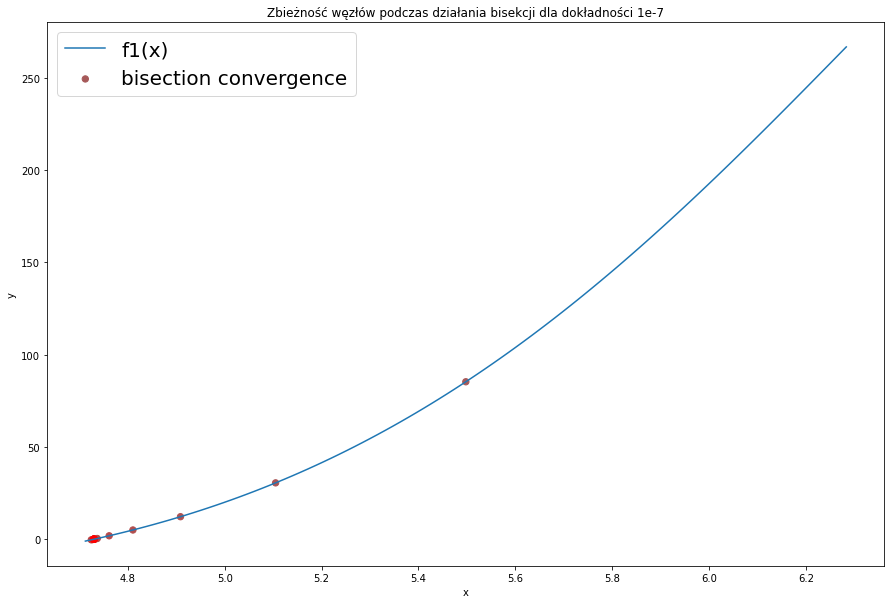

In [10]:
# przygotowanie węzłów zbiegających do pierwiastka
precision = 50
absError = mpf('1e-7')
a = mpf(3 / 2 * pi)
b = mpf(2 * pi)
xNodes, yNodes = bisectionConvergence(f1, precision, a, b, absError)
rgbs = [scaleSaturation(1., 0., 0., scale) for scale in np.linspace(0.3, 1, len(xNodes))]

# przygotowanie argumentów dla funkcji
n = 100
args = np.linspace(3 / 2 * pi, 2 * pi, n)
values = [f1(x) for x in args]

plt.figure(figsize=(15, 10))
plt.plot(args, values, label='f1(x)')
plt.scatter(xNodes, yNodes, s=40, label='bisection convergence', c=rgbs)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Zbieżność węzłów podczas działania bisekcji dla dokładności 1e-7")
plt.legend(prop={'size': 20})
plt.show

# c)

<function matplotlib.pyplot.show(close=None, block=None)>

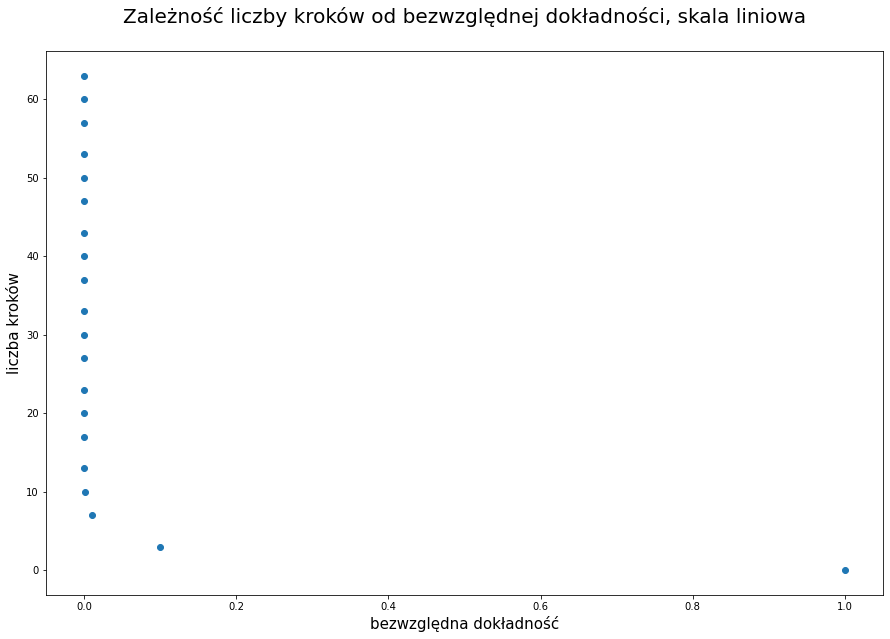

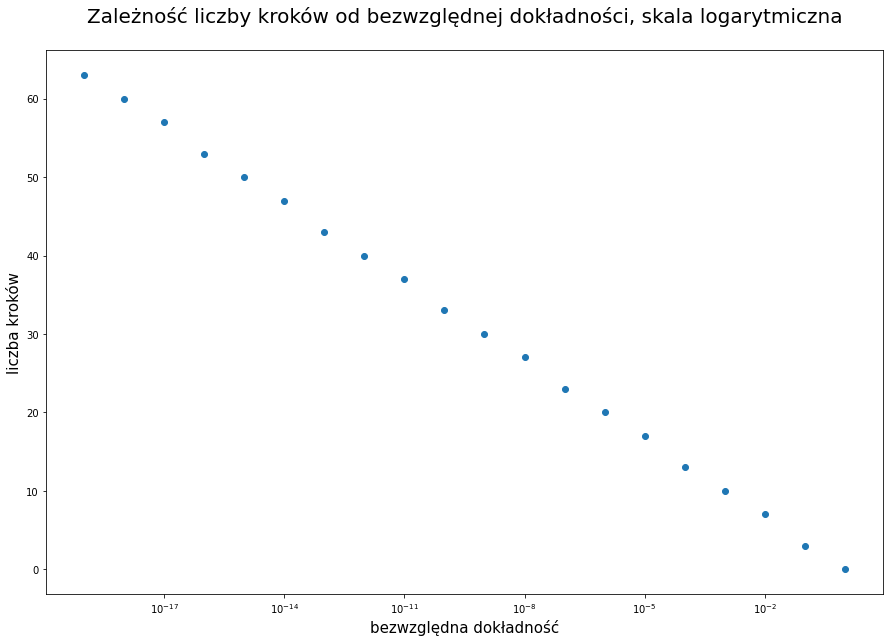

In [11]:
# przygotowanie danych do wykresu
n = 20
args = []
values = []
for i in range(n):
    absError = 10 ** (-i)
    args.append(absError)
    (_, _, steps) = bisection(f1, precision, a, b, absError)
    values.append(steps)

# skala liniowa
plt.figure(figsize=(15, 10))
plt.scatter(args, values)
plt.xlabel('bezwzględna dokładność', fontsize=15)
plt.ylabel('liczba kroków', fontsize=15)
plt.title("Zależność liczby kroków od bezwzględnej dokładności, skala liniowa\n", fontsize=20)
plt.show
    
# skala logarytmiczna
plt.figure(figsize=(15, 10))
plt.scatter(args, values)
plt.xlabel('bezwzględna dokładność', fontsize=15)
plt.ylabel('liczba kroków', fontsize=15)
plt.title("Zależność liczby kroków od bezwzględnej dokładności, skala logarytmiczna\n", fontsize=20)
plt.xscale('log')
plt.show

Liczba kroków:
[0, 3, 7, 10, 13, 17, 20, 23, 27, 30, 33, 37, 40, 43, 47, 50, 53, 57, 60, 63]
---------------------------
g(absError):
[1, 4, 8, 11, 14, 18, 21, 24, 28, 31, 34, 38, 41, 44, 48, 51, 54, 58, 61, 64]


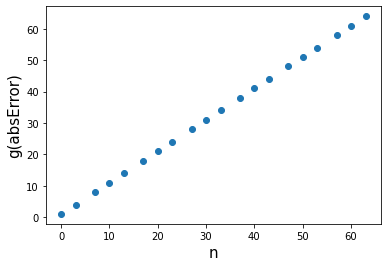

In [12]:
def g(a, b, absError):
    return ceil(log((b - a) / absError) / log(2))
    
a = mpf(3 / 2 * pi)
b = mpf(2 * pi)

values2 = [g(a, b, x) for x in args]

plt.figure()
plt.scatter(values, values2)
plt.xlabel('n',fontsize=15)
plt.ylabel('g(absError)', fontsize=15)
plt.show

print("Liczba kroków:")
print(values)
print("---------------------------")
print("g(absError):")
print(values2)

W przypadku użycia funkcji ceil() liczba kroków jest przesunięta o 1 w stosunku do wartości funkcji g(absError). Gdy użyję funkcji floor() wyniki się pokrywają

# Zad 2

Korzystam ze wzoru rekurencyjnego na kolejne przyblizenia:

$$x_{k+1} = x_k - \frac{f(x_k)}{\frac{df}{dx} x_k}$$

In [13]:
def derivative(x, numOfFun): # funkcja zwraca pochodną w punkcie dla funkcji testowych f1, f2, f3
    if numOfFun == 1:
        return cos(x) * sinh(x) - sin(x) * cosh(x)
    elif numOfFun == 2:
        return -1 / x ** 2 + -1 / (cos(x)) ** 2
    elif numOfFun == 3:
        return exp(x) - 2 ** (-x) * log(2) - 2 * sin(x)
    
    else:
        print("this numOfFun is unsupported.")
        return
    
def newtonMethod(f, precision, numOfFun, a, b, maxSteps, absError): # punkt startowy: a; steps init = 0
    if f(a) * f(b) > 0:
        print("Invalid data")
        return
    
    steps = 0
    with mp.workdps(precision):
        root = a
        prevRoot = b
        while steps < maxSteps and abs(root - prevRoot) > absError:
            prevRoot = root
            root -= f(root) / derivative(root, numOfFun)
            steps += 1
            
        return root, f(root), steps

# a)

In [14]:
a = mpf(3 / 2 * pi)
b = mpf(2 * pi)
absError = mpf('1e-7')

absError = mpf('1e-7')
print("Test f1 dla dokładności:", absError)
x0, value, steps = newtonMethod(f1, precision, 1, a, b, 100, absError)
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

absError = mpf('1e-15')
print("Test f1 dla dokładności:", absError)
x0, value, steps = newtonMethod(f1, precision, 1, a, b, 100, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

absError = mpf('1e-33')
print("Test f1 dla dokładności:", absError)
x0, value, steps = newtonMethod(f1, precision, 1, a, b, 100, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

print("Wymuszenie trzech kroków dla dokładności:", absError)
x0, value, steps = newtonMethod(f1, precision, 1, a, b, 3, absError)
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

Test f1 dla dokładności: 1.0e-7
Miejsce zerowe: 4.73004074486271 
Wartość: 5.26777262789145e-13 
Liczba kroków: 3 
---------------
Test f1 dla dokładności: 1.0e-15
Miejsce zerowe: 4.7300407448627 
Wartość: 2.13821176807376e-50 
Liczba kroków: 5 
---------------
Test f1 dla dokładności: 1.0e-33
Miejsce zerowe: 4.7300407448627 
Wartość: 2.13821176807376e-50 
Liczba kroków: 6 
---------------
Wymuszenie trzech kroków dla dokładności: 1.0e-33
Miejsce zerowe: 4.73004074486271 
Wartość: 5.26777262789145e-13 
Liczba kroków: 3 
---------------


Pierwsza i druga pochodna powinny mieć stały znak na przedziale. W przypadku f2 tak nie jest (wykres poniżej) - występuje punkt przegięcia, dlatego wyniki odbiegają od poprawnych.

Text(0.5, 1.0, "sign(f2''(x))")

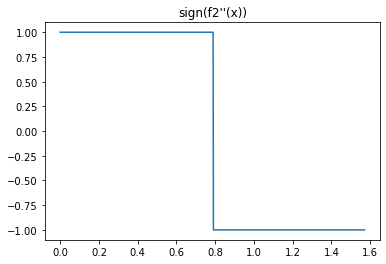

In [15]:
args = np.linspace(0 + 0.0001, pi / 2, 1000)
values = [sign(2 / x ** 3 - 2 * sin(x) / (cos(x)) ** 3) for x in args]
plt.plot(args, values)
plt.title("sign(f2''(x))")

In [16]:
# f3

a = mpf(1)
b = mpf(3)

absError = mpf('1e-7')
print("Test f3 dla dokładności:", absError)
x0, value, steps = newtonMethod(f3, precision, 3, a, b, 100, absError)
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

absError = mpf('1e-15')
print("Test f3 dla dokładności:", absError)
x0, value, steps = newtonMethod(f3, precision, 3, a, b, 100, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

absError = mpf('1e-33')
print("Test f3 dla dokładności:", absError)
x0, value, steps = newtonMethod(f3, precision, 3, a, b, 100, absError) 
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

print("Wymuszenie trzech kroków dla dokładności:", absError)
x0, value, steps = newtonMethod(f3, precision, 3, a, b, 3, absError)
print("Miejsce zerowe:", x0, "\nWartość:", value, "\nLiczba kroków:", steps, "\n---------------")

Test f3 dla dokładności: 1.0e-7
Miejsce zerowe: 1.82938360193385 
Wartość: 1.15112005423573e-18 
Liczba kroków: 8 
---------------
Test f3 dla dokładności: 1.0e-15
Miejsce zerowe: 1.82938360193385 
Wartość: 2.10225507429974e-36 
Liczba kroków: 9 
---------------
Test f3 dla dokładności: 1.0e-33
Miejsce zerowe: 1.82938360193385 
Wartość: 0.0 
Liczba kroków: 10 
---------------
Wymuszenie trzech kroków dla dokładności: 1.0e-33
Miejsce zerowe: 2.19729448422528 
Wartość: 2.04605221552968 
Liczba kroków: 3 
---------------


# b)

Tworzę analogicznie funkcje newtonMethodConvergence

In [18]:
def newtonMethodConvergence(f, precision, numOfFun, a, b, maxSteps, absError): # punkt startowy: a; steps init = 0
    if f(a) * f(b) > 0:
        print("Invalid data")
        return
    stepsArr = []
    steps = 0
    with mp.workdps(precision):
        root = a
        prevRoot = b
        while steps < maxSteps and abs(root - prevRoot) > absError:
            stepsArr.append(root)
            prevRoot = root
            root -= f(root) / derivative(root, numOfFun)
            steps += 1
            
        return stepsArr, [f(x) for x in stepsArr]

<function matplotlib.pyplot.show(close=None, block=None)>

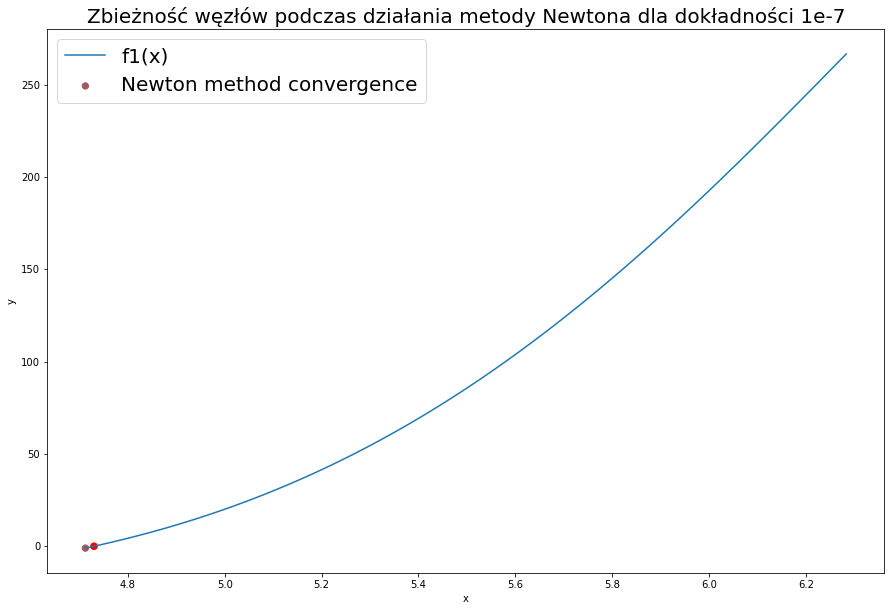

In [23]:
# przygotowanie węzłów zbiegających do pierwiastka
precision = 50
absError = mpf('1e-7')
a = mpf(3 / 2 * pi)
b = mpf(2 * pi)
xNodes, yNodes = newtonMethodConvergence(f1, precision, 1, a, b, 100, absError)
rgbs = [scaleSaturation(1., 0., 0., scale) for scale in np.linspace(0.3, 1, len(xNodes))]

# przygotowanie argumentów dla funkcji
n = 100
args = np.linspace(3 / 2 * pi, 2 * pi, n)
values = [f1(x) for x in args]

plt.figure(figsize=(15, 10))
plt.plot(args, values, label='f1(x)')
plt.scatter(xNodes, yNodes, s=40, label='Newton method convergence', c=rgbs)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Zbieżność węzłów podczas działania metody Newtona dla dokładności 1e-7", fontsize=20)
plt.legend(prop={'size': 20})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

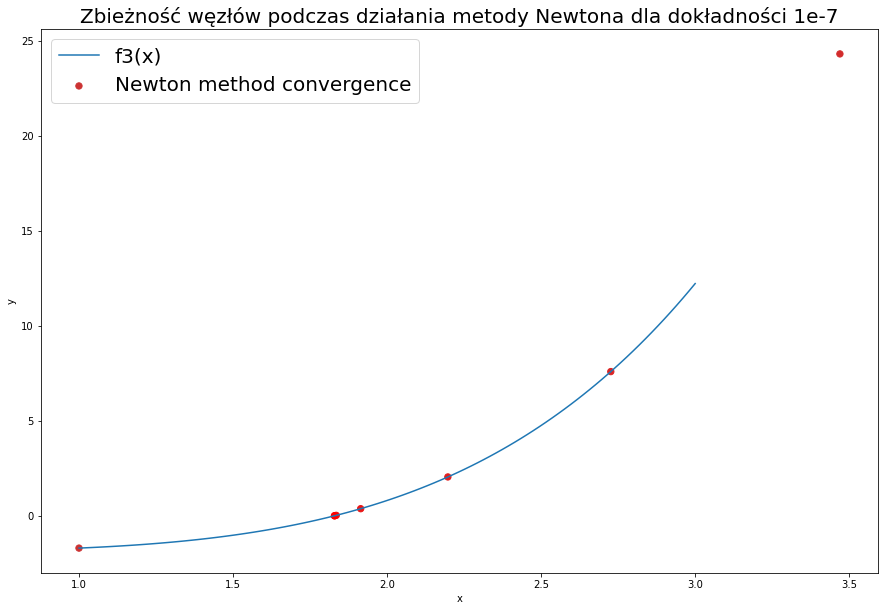

In [24]:
# przygotowanie węzłów zbiegających do pierwiastka
precision = 50
absError = mpf('1e-7')
a = mpf(1)
b = mpf(3)
xNodes, yNodes = newtonMethodConvergence(f3, precision, 3, a, b, 100, absError)
rgbs = [scaleSaturation(1., 0., 0., scale) for scale in np.linspace(0.6, 1, len(xNodes))]

# przygotowanie argumentów dla funkcji
n = 100
args = np.linspace(1, 3, n)
values = [f3(x) for x in args]

plt.figure(figsize=(15, 10))
plt.plot(args, values, label='f3(x)')
plt.scatter(xNodes, yNodes, s=40, label='Newton method convergence', c=rgbs)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Zbieżność węzłów podczas działania metody Newtona dla dokładności 1e-7", fontsize=20)
plt.legend(prop={'size': 20})
plt.show

# c)

# f1(x)

<function matplotlib.pyplot.show(close=None, block=None)>

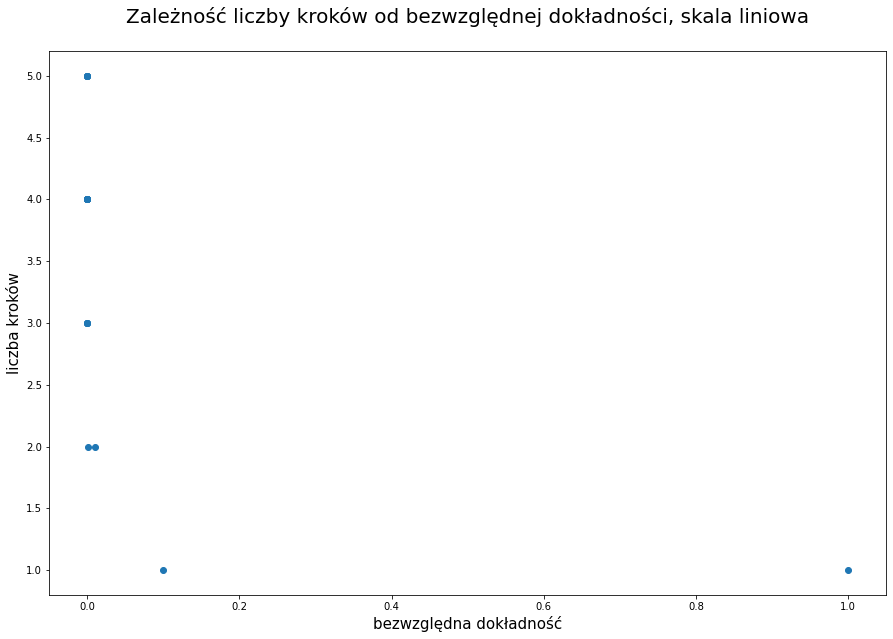

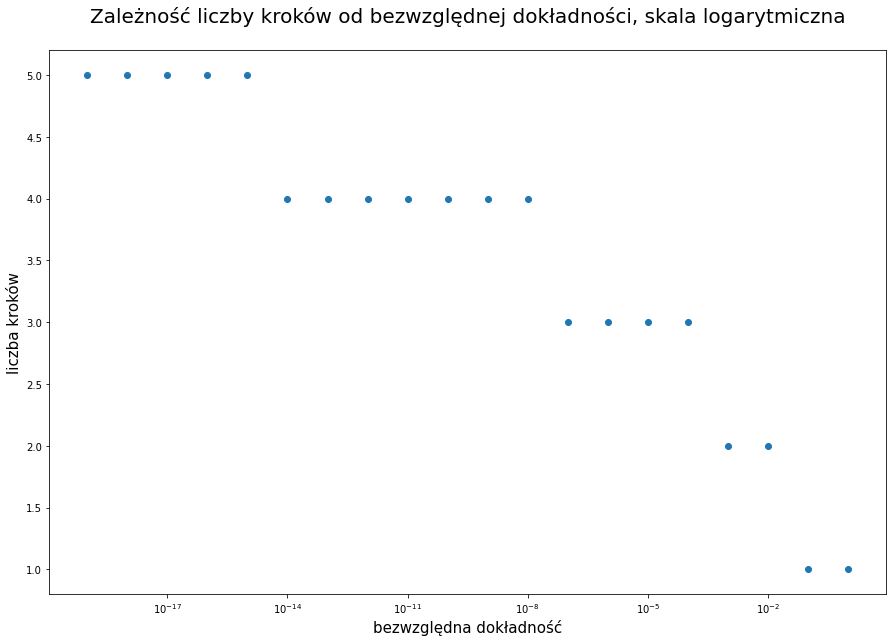

In [25]:
# przygotowanie danych do wykresu
a = mpf(3 / 2 * pi)
b = mpf(2 * pi)

n = 20
args = []
values = []
for i in range(n):
    absError = 10 ** (-i)
    args.append(absError)
    (_, _, steps) = newtonMethod(f1, precision, 1, a, b, 100, absError)
    values.append(steps)

# skala liniowa
plt.figure(figsize=(15, 10))
plt.scatter(args, values)
plt.xlabel('bezwzględna dokładność', fontsize=15)
plt.ylabel('liczba kroków', fontsize=15)
plt.title("Zależność liczby kroków od bezwzględnej dokładności, skala liniowa\n", fontsize=20)
plt.show
    
# skala logarytmiczna
plt.figure(figsize=(15, 10))
plt.scatter(args, values)
plt.xlabel('bezwzględna dokładność', fontsize=15)
plt.ylabel('liczba kroków', fontsize=15)
plt.title("Zależność liczby kroków od bezwzględnej dokładności, skala logarytmiczna\n", fontsize=20)
plt.xscale('log')
plt.show

# f3(x)

<function matplotlib.pyplot.show(close=None, block=None)>

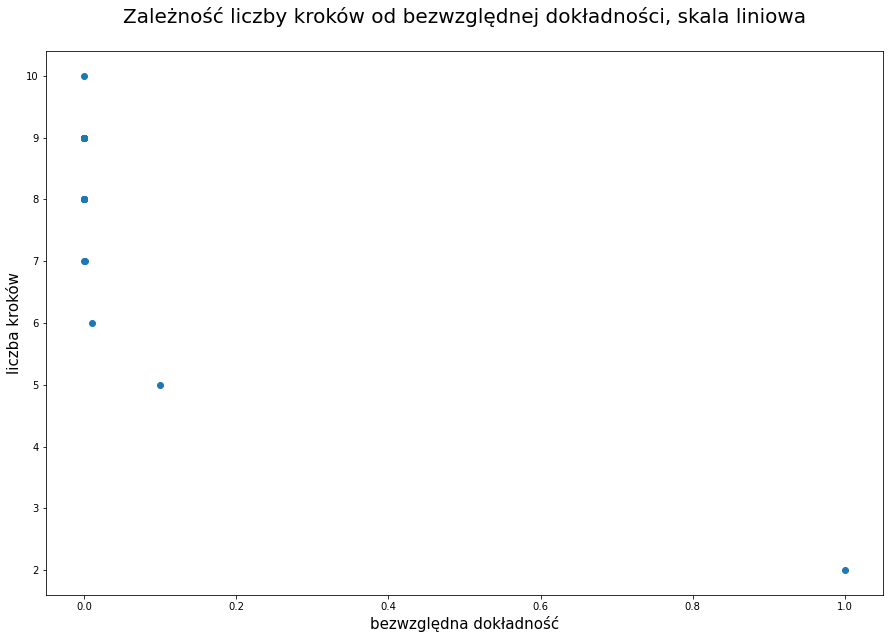

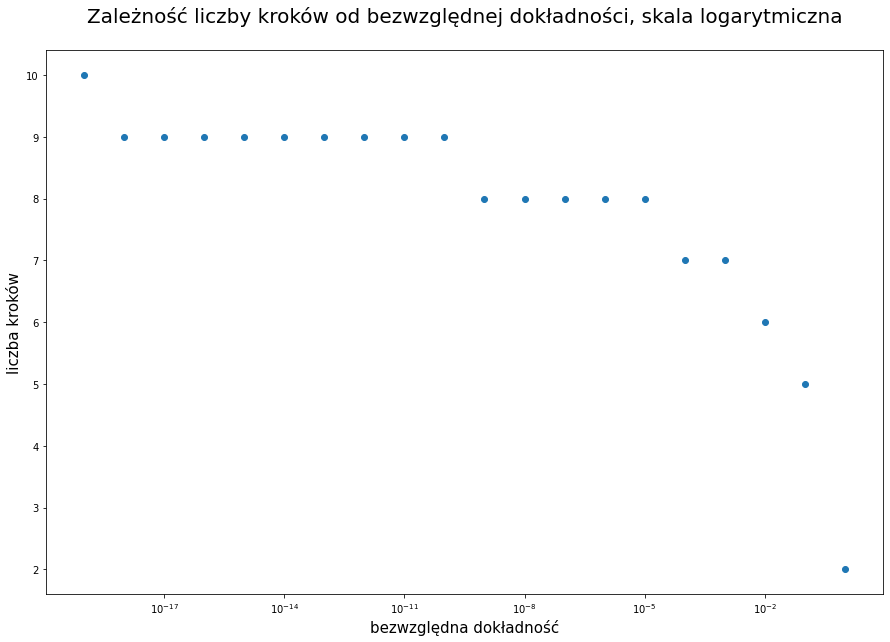

In [138]:
a = mpf(1)
b = mpf(3)

n = 20
args = []
values = []
for i in range(n):
    absError = 10 ** (-i)
    args.append(absError)
    (_, _, steps) = newtonMethod(f3, precision, 3, a, b, 100, absError)
    values.append(steps)

# skala liniowa
plt.figure(figsize=(15, 10))
plt.scatter(args, values)
plt.xlabel('bezwzględna dokładność', fontsize=15)
plt.ylabel('liczba kroków', fontsize=15)
plt.title("Zależność liczby kroków od bezwzględnej dokładności, skala liniowa\n", fontsize=20)
plt.show
    
# skala logarytmiczna
plt.figure(figsize=(15, 10))
plt.scatter(args, values)
plt.xlabel('bezwzględna dokładność', fontsize=15)
plt.ylabel('liczba kroków', fontsize=15)
plt.title("Zależność liczby kroków od bezwzględnej dokładności, skala logarytmiczna\n", fontsize=20)
plt.xscale('log')
plt.show

Wykres zbieżności różni się od wykresu dla metody bisekcji - metoda Newtona potrzebuje znacznie mniejszej ilości kroków, do osiągnięcia oczekiwanych rezultatów, a jeden krok jest w stanie zapewnić dokładność dla zmniejszenia błędu o kilka rzędów wielkości, ale wymagania na funkcję są bardziej szczegółowe - pierwsza i druga pochodna muszą mieć stały znak na przedziale. 